<a href="https://colab.research.google.com/github/Yuxi2910/Projects_in_ML_3/blob/main/Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QMSS5074GR - Final Project (3rd)


### Your Grp ID: [Fill Here]
### Your UNIs: [yx2910, ]
### Your Full Names: [Yuxi Xiao, ]
### Public GitHub Repo: [yx2910/repo]

## Description

## Part 1 – Data Ingestion & Preprocessing

1. **Data Loading**  
   - Acquire the Stanford Sentiment Treebank dataset.  
   - Split into training, validation and test sets with stratified sampling to preserve class balance.  
   - Clearly document your splitting strategy and resulting dataset sizes.


2. **Text Cleaning & Tokenization**  
   - Implement a reusable preprocessing pipeline that handles at least:  
     - HTML removal, lowercasing, punctuation stripping  
     - Vocabulary pruning (e.g., rare words threshold)  
     - Tokenization (character- or word-level)  
   - Expose this as a function/class so it can be saved and re-loaded for inference.

3. **Feature Extraction**  
   - **Traditional**: Build a TF-IDF vectorizer (or n-gram count) pipeline.  
   - **Neural**: Prepare sequences for embedding—pad/truncate to a fixed length.  
   - Save each preprocessor (vectorizer/tokenizer) to disk.

---

## Part 2 – Exploratory Data Analysis (EDA)

1. **Class Distribution**  
   - Visualize the number of positive vs. negative reviews.  
   - Compute descriptive statistics on review lengths (mean, median, IQR).  

2. **Text Characteristics**  
   - Plot the 20 most frequent tokens per sentiment class.  
   - Generate word clouds (or bar charts) highlighting key terms for each class.  

3. **Correlation Analysis**  
   - Analyze whether review length correlates with sentiment.  
   - Present findings numerically and with at least one visualization.

---

## Part 3 – Baseline Traditional Models

1. **Logistic Regression & SVM**  
   - Train at least two linear models on your TF-IDF features (e.g., logistic regression, linear SVM).  
   - Use cross-validation (≥ 5 folds) on the training set to tune at least one hyperparameter.  

2. **Random Forest & Gradient Boosting**  
   - Train two tree-based models (e.g., Random Forest, XGBoost) on the same features.  
   - Report feature-importance for each and discuss any notable tokens.

3. **Evaluation Metrics**  
   - Compute accuracy, precision, recall, F1-score, and ROC-AUC on the **held-out test set**.  
   - Present all results in a single comparison table.

---

## Part 4 – Neural Network Models

1. **Simple Feed-Forward**  
   - Build an embedding layer + a dense MLP classifier.  
   - Ensure you freeze vs. unfreeze embeddings in separate runs.

2. **Convolutional Text Classifier**  
   - Implement a 1D-CNN architecture (Conv + Pooling) for sequence data.  
   - Justify your choice of kernel sizes and number of filters.

3. **Recurrent Model (Optional)**  
   - (Stretch) Add an RNN or Bi-LSTM layer and compare performance/time vs. CNN.

---

## Part 5 – Transfer Learning & Advanced Architectures

1. **Pre-trained Embeddings**  
   - Retrain one network using pre-trained GloVe (or FastText) embeddings.  
   - Compare results against your from-scratch embedding runs.

2. **Transformer Fine-Tuning**  
   - Fine-tune a BERT-family model on the training data.  
   - Clearly outline your training hyperparameters (learning rate, batch size, epochs).


---

## Part 6 – Hyperparameter Optimization

1. **Search Strategy**  
   - Use a library (e.g., Keras Tuner, Optuna) to optimize at least two hyperparameters of one deep model.  
   - Describe your search space and stopping criteria.

2. **Results Analysis**  
   - Report the best hyperparameter configuration found.  
   - Plot validation-loss (or metric) vs. trials to illustrate tuning behavior.

---

## Part 7 – Final Comparison & Error Analysis

1. **Consolidated Results**  
   - Tabulate test-set performance for **all** models (traditional, neural, transfer-learned).  
   - Highlight top‐performing model overall and top in each category.

2. **Statistical Significance**  
   - Perform a significance test (e.g., McNemar’s test) between your best two models.  

3. **Error Analysis**  
   - Identify at least 20 examples your best model misclassified.  
   - For a sample of 5, provide the raw text, predicted vs. true label, and a short discussion of each error—what linguistic artifact might have confused the model?

---

## Part 8 – Optional Challenge Extensions

- Implement data augmentation for text (back-translation, synonym swapping) and measure its impact.  
- Integrate a sentiment lexicon feature (e.g., VADER scores) into your models and assess whether it improves predictions.  
- Deploy your best model as a simple REST API using Flask or FastAPI and demo it on a handful of user‐submitted reviews.

---

## Start coding .....

ps. the code below is just an filler code with some tips on the top it.


But the main project requirements are listed above in the description.

## Part 1 – Data Ingestion & Preprocessing


1. **Data Loading**  
    - Acquire the Stanford Sentiment Treebank dataset.
    - Split into training, validation, and test sets with stratified sampling to preserve class balance.
    - Clearly document your splitting strategy and resulting dataset sizes.
    

In [2]:
!pip install datasets
from datasets import load_dataset

# 加载 SST-2（GLUE 任务）
dataset = load_dataset("glue", "sst2")
print(dataset)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which 

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/35.3k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/3.11M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/72.8k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/148k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 67349
    })
    validation: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 872
    })
    test: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 1821
    })
})


In [3]:
from datasets import load_dataset
from collections import Counter

# load SST-2
ds = load_dataset("glue", "sst2")

for split in ["train", "validation", "test"]:
    labels = ds[split]["label"]
    n = len(labels)
    counter = Counter(labels)
    print(f"—— {split.upper():10s} ——")
    print(f"size = {n}")
    print("counts:", counter)
    print("ratio :", {k: v/n for k, v in counter.items()})
    print()

—— TRAIN      ——
size = 67349
counts: Counter({1: 37569, 0: 29780})
ratio : {0: 0.44217434557305973, 1: 0.5578256544269403}

—— VALIDATION ——
size = 872
counts: Counter({1: 444, 0: 428})
ratio : {1: 0.5091743119266054, 0: 0.4908256880733945}

—— TEST       ——
size = 1821
counts: Counter({-1: 1821})
ratio : {-1: 1.0}



In [4]:
from datasets import load_dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter

# 1. Load only the labeled parts
ds    = load_dataset("glue", "sst2")
train = pd.DataFrame(ds["train"])
dev   = pd.DataFrame(ds["validation"])
test  = pd.DataFrame(ds["test"])

# 2. Merge them
df_all = pd.concat([train, dev], ignore_index=True)

# 3. Split off 10% for your TEST set (stratified by 'label')
train_dev, test = train_test_split(
    df_all,
    test_size=0.10,
    stratify=df_all["label"],
    random_state=42
)

# 4. From the remaining 90%, split out 11.11% (~0.10/0.90) for VALIDATION
train, val = train_test_split(
    train_dev,
    test_size=0.1111,
    stratify=train_dev["label"],
    random_state=42
)

# 5. Inspect sizes & class ratios
for name, split in [("Train", train), ("Val", val), ("Test", test)]:
    cnt = Counter(split["label"])
    print(f"{name:5s} | n={len(split):5d} | ratio={cnt[0]/len(split):.3f}/{cnt[1]/len(split):.3f}")

Train | n=54576 | ratio=0.443/0.557
Val   | n= 6822 | ratio=0.443/0.557
Test  | n= 6823 | ratio=0.443/0.557


Data is split into three sets. Now we have obtained the same ratio for each set, class balance is preserved. Sizes are documented as "n".


2. **Text Cleaning & Tokenization**  
    - Implement a reusable preprocessing pipeline that handles at least:  
        - HTML removal, lowercasing, punctuation stripping  
        - Vocabulary pruning (e.g., rare words threshold)  
        - Tokenization (character- or word-level)  
    - Expose this as a function/class so it can be saved and re-loaded for inference.
    

In [5]:
import re
import string
import pickle
from collections import Counter
from sklearn.base import TransformerMixin, BaseEstimator

class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self,
                 min_freq: int = 5,
                 lowercase: bool = True,
                 strip_punct: bool = True,
                 tokenizer: str = "word"   # "word" or "char"
                ):
        self.min_freq    = min_freq
        self.lowercase   = lowercase
        self.strip_punct = strip_punct
        self.tokenizer   = tokenizer

    def _clean_text(self, text: str) -> str:
        # 1) Remove HTML tags
        text = re.sub(r"<[^>]+>", " ", text)
        # 2) Lowercase
        if self.lowercase:
            text = text.lower()
        # 3) Strip punctuation
        if self.strip_punct:
            text = text.translate(
                str.maketrans(string.punctuation, " " * len(string.punctuation))
            )
        return text

    def _tokenize(self, text: str):
        if self.tokenizer == "char":
            # character-level tokens (drop spaces)
            return list(text.replace(" ", ""))
        else:
            # whitespace word tokens
            return text.split()

    def fit(self, X, y=None):
        # Build vocabulary from training texts
        counter = Counter()
        for doc in X:
            cleaned = self._clean_text(doc)
            tokens  = self._tokenize(cleaned)
            counter.update(tokens)
        # Keep only tokens that appear >= min_freq
        self.vocab_ = {tok for tok,freq in counter.items() if freq >= self.min_freq}
        return self

    def transform(self, X):
        # Clean, tokenize and prune any token not in vocab_
        out = []
        for doc in X:
            cleaned = self._clean_text(doc)
            tokens  = self._tokenize(cleaned)
            tokens  = [t for t in tokens if t in self.vocab_]
            out.append(tokens)
        return out

    def save(self, path: str):
        with open(path, "wb") as f:
            pickle.dump(self, f)

    @classmethod
    def load(cls, path: str):
        with open(path, "rb") as f:
            return pickle.load(f)


# Assume you have pandas DataFrames `train`, `val`, `test` each with a 'sentence' column:
train_sentences = train["sentence"].tolist()
val_sentences   = val["sentence"].tolist()
test_sentences  = test["sentence"].tolist()

# 2.1  Instantiate and fit on train only
preproc = TextPreprocessor(min_freq=5, tokenizer="word")
preproc.fit(train_sentences)

# 2.2  Transform all splits into List[List[str]]
X_train_tokens = preproc.transform(train_sentences)
X_val_tokens   = preproc.transform(val_sentences)
X_test_tokens  = preproc.transform(test_sentences)

# 2.3  Save the preprocessor for inference
preproc.save("text_preprocessor.pkl")


3. **Feature Extraction**  
    - **Traditional**: Build a TF-IDF vectorizer (or n-gram count) pipeline.  
    - **Neural**: Prepare sequences for embedding—pad/truncate to a fixed length.  
    - Save each preprocessor (vectorizer/tokenizer) to disk.
    

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 3.1 Build a TF–IDF vectorizer that accepts token lists directly

def identity_tokenizer(tokens):
    return tokens

def identity_preprocessor(tokens):
    return tokens

vectorizer = TfidfVectorizer(
    tokenizer=identity_tokenizer,    # use the defined function instead of lambda
    preprocessor=identity_preprocessor, # use the defined function instead of lambda
    lowercase=False,          # we handled casing upstream
    token_pattern=None,
    ngram_range=(1,2),        # unigrams + bigrams
    min_df=5,                 # drop tokens appearing in fewer than 5 docs
    max_features=5000         # limit vocabulary to top 5000 features
)

# 3.2 Fit on train and transform all splits
X_train_tfidf = vectorizer.fit_transform(X_train_tokens)
X_val_tfidf   = vectorizer.transform(X_val_tokens)
X_test_tfidf  = vectorizer.transform(X_test_tokens)

# 3.3 Save the vectorizer for inference
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

# Now have:
#  - X_train_tfidf, X_val_tfidf, X_test_tfidf  (sparse matrices)
#  - text_preprocessor.pkl
#  - tfidf_vectorizer.pkl
# … ready to plug into ML models

## Part 2 – Exploratory Data Analysis (EDA)


1. **Class Distribution**  
    - Visualize the number of positive vs. negative reviews.  
    - Compute descriptive statistics on review lengths (mean, median, IQR).
    

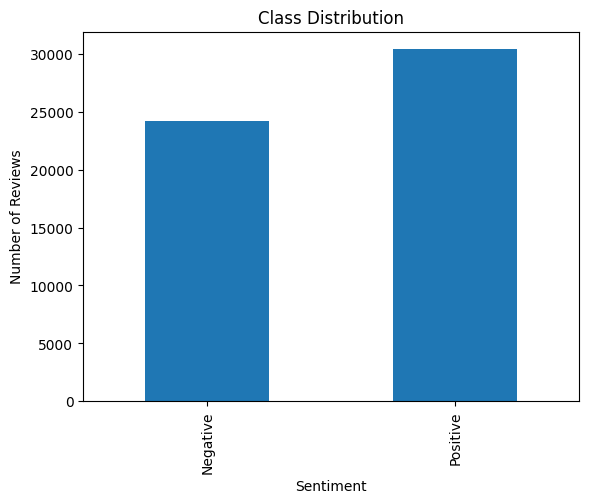


Review Length Descriptive Statistics:
               mean  median   IQR
Negative  10.022304     8.0  10.0
Positive   9.154719     6.0  10.0


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Use the correct DataFrame (e.g., 'train', 'val', or 'test')
# Replace 'df' with the appropriate DataFrame name
df = train  # or val, or test, depending on which you want to analyze

# 1) Compute review length (in words)
df['length'] = df['sentence'].str.split().apply(len)

# 2) Plot class distribution
counts = df['label'].value_counts().sort_index()
plt.figure()
counts.plot(kind='bar')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.title('Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

# 3) Descriptive statistics on lengths
grouped = df.groupby('label')['length']
stats = pd.DataFrame({
    'mean': grouped.mean(),
    'median': grouped.median(),
    'IQR': grouped.quantile(0.75) - grouped.quantile(0.25)
})
stats.index = ['Negative', 'Positive']
print("\nReview Length Descriptive Statistics:")
print(stats)

## Part 3 – Baseline Traditional Models


1. **Logistic Regression & SVM**  
    - Train at least two linear models on your TF-IDF features.  
    - Use cross-validation (≥ 5 folds) on the training set to tune at least one hyperparameter.
    

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Extract the target variable (sentiment labels) from the training data
y_train = train['label'].values
y_val = val['label'].values
y_test = test['label'].values

## now obtained:
# X_train_tfidf, y_train
# X_val_tfidf,   y_val

# 1) Logistic Regression with C tuning
log_reg = LogisticRegression(max_iter=5000, solver="liblinear")
param_grid_lr = {"C": [0.01, 0.1, 1, 10]}

grid_lr = GridSearchCV(
    log_reg,
    param_grid_lr,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)
grid_lr.fit(X_train_tfidf, y_train)

print("Best LR params:", grid_lr.best_params_)
print("CV  mean accuracy:", grid_lr.best_score_)

# Evaluate on your validation set
y_pred_lr = grid_lr.predict(X_val_tfidf)
print("\n=== Logistic Regression on VAL ===")
print(classification_report(y_val, y_pred_lr, target_names=["neg","pos"]))


# 2) Linear SVM with C tuning
svm = LinearSVC(max_iter=5000)
param_grid_svm = {"C": [0.01, 0.1, 1, 10]}

grid_svm = GridSearchCV(
    svm,
    param_grid_svm,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)
grid_svm.fit(X_train_tfidf, y_train)

print("Best SVM params:", grid_svm.best_params_)
print("CV  mean accuracy:", grid_svm.best_score_)

# Evaluate on your validation set
y_pred_svm = grid_svm.predict(X_val_tfidf)
print("\n=== Linear SVM on VAL ===")
print(classification_report(y_val, y_pred_svm, target_names=["neg","pos"]))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best LR params: {'C': 10}
CV  mean accuracy: 0.8525725034398356

=== Logistic Regression on VAL ===
              precision    recall  f1-score   support

         neg       0.85      0.80      0.83      3021
         pos       0.85      0.89      0.87      3801

    accuracy                           0.85      6822
   macro avg       0.85      0.85      0.85      6822
weighted avg       0.85      0.85      0.85      6822

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best SVM params: {'C': 1}
CV  mean accuracy: 0.8521327701800464

=== Linear SVM on VAL ===
              precision    recall  f1-score   support

         neg       0.85      0.80      0.83      3021
         pos       0.85      0.89      0.87      3801

    accuracy                           0.85      6822
   macro avg       0.85      0.85      0.85      6822
weighted avg       0.85      0.85      0.85      6822



## Part 4 – Neural Network Models


1. **Simple Feed-Forward**  
    - Build an embedding layer + a dense MLP classifier.  
    - Ensure you freeze vs. unfreeze embeddings in separate runs.
    

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam # import Adam optimizer


# 1. Prepare data for neural network
# Tokenize and create vocabulary
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train_tokens)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train_tokens)
X_val_seq = tokenizer.texts_to_sequences(X_val_tokens)
X_test_seq = tokenizer.texts_to_sequences(X_test_tokens)

# Pad sequences
MAX_LEN = 100  # Adjust maximum sequence length as needed
X_train_seq = pad_sequences(X_train_seq, maxlen=MAX_LEN)
X_val_seq = pad_sequences(X_val_seq, maxlen=MAX_LEN)
X_test_seq = pad_sequences(X_test_seq, maxlen=MAX_LEN)

# Get vocabulary size
VOCAB_SIZE = len(tokenizer.word_index) + 1

# 2. Build and train the model
def build_ffn_model(vocab_size, embed_dim=128, trainable_embed=True):
    """
    Builds a simple FFN: Embedding → GlobalAvgPool → Dense(64) → Dense(1).
    trainable_embed toggles whether embeddings are frozen.
    """
    model = Sequential([
        Embedding(input_dim=vocab_size,
                  output_dim=embed_dim,
                  input_length=MAX_LEN,
                  trainable=trainable_embed,
                  name="embedding"),
        GlobalAveragePooling1D(),
        Dense(64, activation="relu"),
        Dense(1, activation="sigmoid")
    ])
    model.compile(
        optimizer=Adam(1e-3),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

# 1) Training run with embeddings FROZEN
model_frozen = build_ffn_model(VOCAB_SIZE, embed_dim=128, trainable_embed=False)
print(">>> Training with FROZEN embeddings")
model_frozen.fit(
    X_train_seq, y_train,
    validation_data=(X_val_seq, y_val),
    epochs=5, batch_size=32
)

# 2) Training run with embeddings UNFROZEN
model_unfrozen = build_ffn_model(VOCAB_SIZE, embed_dim=128, trainable_embed=True)
print("\n>>> Training with TRAINABLE embeddings")
model_unfrozen.fit(
    X_train_seq, y_train,
    validation_data=(X_val_seq, y_val),
    epochs=5, batch_size=32
)

# 3) Final evaluation on test set
print("\n--- Final Evaluation on Test Set ---")
print("Frozen embedding model:")
model_frozen.evaluate(X_test_seq, y_test)
print("Unfrozen embedding model:")
model_unfrozen.evaluate(X_test_seq, y_test)

>>> Training with FROZEN embeddings
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1706/1706 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5576 - loss: 0.6865 - val_accuracy: 0.5572 - val_loss: 0.6865
Epoch 2/5
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5599 - loss: 0.6857 - val_accuracy: 0.5572 - val_loss: 0.6865
Epoch 3/5
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5559 - loss: 0.6866 - val_accuracy: 0.5572 - val_loss: 0.6875
Epoch 4/5
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5521 - loss: 0.6871 - val_accuracy: 0.5572 - val_loss: 0.6863
Epoch 5/5
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5553 - loss: 0.6863 - val_accuracy: 0.5572 - val_loss: 0.6856

>>> Training with TRAINABLE embeddings
Epoch 1/5
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.5782 - loss: 0.6709 - val_accuracy: 0.8028 - val_loss: 0.4611
Epoch 2/5
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.7778 - loss: 0.4606 - val_accuracy: 0.8411 - val_loss: 0.3599
Epoch 3/5
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accura

[0.31900274753570557, 0.8582735061645508]

## Part 5 – Transfer Learning & Advanced Architectures


1. **Pre-trained Embeddings**  
    - Retrain one network using pre-trained GloVe (or FastText) embeddings.
    - Compare results against your from-scratch embedding runs.
    

In [12]:
# Download GloVe (e.g. 100d) from https://nlp.stanford.edu/projects/glove/
# Put `glove.6B.100d.txt` next to your notebook, or update the path below.
!git clone https://github.com/stanfordnlp/GloVe.git
%cd GloVe

!wget http://nlp.stanford.edu/data/glove.6B.zip

# Unzip just the files you need, e.g. the 100-dimensional ones
!unzip glove.6B.zip glove.6B.100d.txt

import numpy as np

EMBEDDING_PATH = "glove.6B.100d.txt"
EMBEDDING_DIM  = 100

# 1) Load into a dict: word → vector
emb_index = {}
with open(EMBEDDING_PATH, encoding="utf8") as f:
    for line in f:
        parts = line.rstrip().split(" ")
        word  = parts[0]
        vec   = np.asarray(parts[1:], dtype="float32")
        if vec.shape[0] == EMBEDDING_DIM:
            emb_index[word] = vec
print(f"Loaded {len(emb_index)} word vectors from GloVe.")

Cloning into 'GloVe'...
remote: Enumerating objects: 661, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 661 (delta 37), reused 47 (delta 32), pack-reused 592 (from 1)
Receiving objects: 100% (661/661), 248.05 KiB | 1.25 MiB/s, done.
Resolving deltas: 100% (375/375), done.
/content/GloVe
--2025-05-03 01:02:35--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-05-03 01:02:35--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-05-03 01:02:35--  

In [13]:
# 2) Build your embedding_matrix aligned to your tokenizer.word_index
MAX_VOCAB_SIZE = 5000  # or any other desired limit
VOCAB_SIZE = min(MAX_VOCAB_SIZE, len(tokenizer.word_index)) + 1
embedding_matrix = np.zeros((VOCAB_SIZE, EMBEDDING_DIM))
for word, idx in tokenizer.word_index.items():
    if idx >= VOCAB_SIZE:
        continue
    vector = emb_index.get(word)
    embedding_matrix[idx] = vector if vector is not None \
                             else np.random.normal(scale=0.6, size=(EMBEDDING_DIM,))

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.optimizers import Adam

def build_glove_model(vocab_size, embed_dim, max_len, trainable=False):
    m = Sequential([
        Embedding(input_dim=vocab_size,
                  output_dim=embed_dim,
                  input_length=max_len,
                  weights=[embedding_matrix],
                  trainable=trainable,
                  name="glove_embedding"),
        GlobalAveragePooling1D(),
        Dense(64, activation="relu"),
        Dense(1, activation="sigmoid")
    ])
    m.compile(optimizer=Adam(1e-3),
              loss="binary_crossentropy",
              metrics=["accuracy"])
    return m

# 3a) Freeze GloVe embeddings
glove_frozen = build_glove_model(VOCAB_SIZE, EMBEDDING_DIM, MAX_LEN, trainable=False)
history_frozen = glove_frozen.fit(
    X_train_seq, y_train,
    validation_data=(X_val_seq, y_val),
    epochs=5, batch_size=32
)

# 3b) unfreeze & fine-tune
glove_trainable = build_glove_model(VOCAB_SIZE, EMBEDDING_DIM, MAX_LEN, trainable=True)
history_tuned = glove_trainable.fit(
    X_train_seq, y_train,
    validation_data=(X_val_seq, y_val),
    epochs=5, batch_size=32
)

Epoch 1/5
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6589 - loss: 0.6141 - val_accuracy: 0.7662 - val_loss: 0.4993
Epoch 2/5
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7652 - loss: 0.4973 - val_accuracy: 0.7743 - val_loss: 0.4686
Epoch 3/5
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7711 - loss: 0.4719 - val_accuracy: 0.7669 - val_loss: 0.4650
Epoch 4/5
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7792 - loss: 0.4581 - val_accuracy: 0.7762 - val_loss: 0.4509
Epoch 5/5
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7798 - loss: 0.4536 - val_accuracy: 0.7806 - val_loss: 0.4454
Epoch 1/5
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.6112 - loss: 0.6491 - val_accuracy: 0.8245 - val_loss: 0.4244
Epoch 2/5
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8067 - loss: 0.4189 - val_accuracy: 0.8430 - val_loss: 0.3605
Epoch 3/5
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8285 - loss: 0.3723 - val_

In [15]:
# Compare results
history_frozen_scratch = model_frozen.fit(
    X_train_seq, y_train,
    validation_data=(X_val_seq, y_val),
    epochs=5, batch_size=32
)
print("Scratch (frozen) final val accuracy:",
      history_frozen_scratch.history["val_accuracy"][-1])
print("GloVe (frozen) final val accuracy:",
      history_frozen.history["val_accuracy"][-1])

history_unfrozen_scratch = model_unfrozen.fit(
    X_train_seq, y_train,
    validation_data=(X_val_seq, y_val),
    epochs=5, batch_size=32
)
print("Scratch (tuned) final val accuracy:",
      history_unfrozen_scratch.history["val_accuracy"][-1])
print("GloVe (tuned) final val accuracy:",
      history_tuned.history["val_accuracy"][-1])

Epoch 1/5
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5590 - loss: 0.6853 - val_accuracy: 0.5572 - val_loss: 0.6866
Epoch 2/5
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5571 - loss: 0.6855 - val_accuracy: 0.5566 - val_loss: 0.6853
Epoch 3/5
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5530 - loss: 0.6859 - val_accuracy: 0.5566 - val_loss: 0.6854
Epoch 4/5
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5569 - loss: 0.6850 - val_accuracy: 0.5570 - val_loss: 0.6849
Epoch 5/5
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5579 - loss: 0.6844 - val_accuracy: 0.5553 - val_loss: 0.6845
Scratch (frozen) final val accuracy: 0.5552623867988586
GloVe (frozen) final val accuracy: 0.7805628776550293
Epoch 1/5
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8633 - loss: 0.3084 - val_accuracy: 0.8528 - val_loss: 0.3317
Epoch 2/5
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8691 - loss: 0.2973 - val_accuracy: 0.8606 - 

Final accuracy results are similar, the GloVe is slightly better, which is expected.

## Part 6 – Hyperparameter Optimization


1. **Search Strategy**  
    - Use a library (e.g., Keras Tuner, Optuna) to optimize at least two hyperparameters of one deep model.
    - Describe your search space and stopping criteria.
    

In [21]:
# 1. Install Keras Tuner
!pip install keras-tuner --quiet

# 2. Import and set up
import tensorflow as tf
from tensorflow import keras
from kerastuner import Hyperband

# X_train_seq is a NumPy array (or tf.Tensor) of shape (n_samples, seq_len) and was obtained in part 2
MAX_LEN = X_train_seq.shape[1]
print("Using existing padded length:", MAX_LEN)


# Assume you already have:
#   X_train_seq, y_train, X_val_seq, y_val, MAX_LEN, VOCAB_SIZE, embedding_matrix

def build_model(hp):
    """
    Build a simple MLP with:
      • a pre-loaded embedding_matrix
      • tunable embedding_dim and hidden units
      • tunable learning rate
    """
    ## embed_dim = hp.Choice("embed_dim", [50, 100, 200]) # Had error here >> 50 is less than the dimension 100, so does not match
    embed_dim = 100 # Fixed embedding dimension to 100
    hidden_units = hp.Choice("hidden_units", [32, 64, 128])
    lr = hp.Float("learning_rate", 1e-4, 1e-2, sampling="log")

    model = keras.Sequential([
        keras.layers.Embedding(
            input_dim=VOCAB_SIZE,
            output_dim=embed_dim,
            input_length=MAX_LEN,
            weights=[embedding_matrix],
            trainable=False,
        ),
        keras.layers.GlobalAveragePooling1D(),
        keras.layers.Dense(hidden_units, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid")
    ])
    model.compile(
        optimizer=keras.optimizers.Adam(lr),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

# 3. Instantiate the tuner
tuner = Hyperband(
    build_model,
    objective="val_accuracy",
    max_epochs=20,          # search will try up to 20 epochs
    factor=3,               # down-sampling factor between brackets
    directory="kt_dir",     # where to store logs
    project_name="sentiment_opt"
)

# 5. Run the hyperparameter search
tuner.search(
    X_train_seq, y_train,
    epochs=50,                   # max epochs per trial (early stop may cut it short)
    validation_data=(X_val_seq, y_val),
    batch_size=32,
    verbose=1
)

# 6. Retrieve the best combination
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best hidden_units  = {best_hp.get('hidden_units')}")
print(f"Best learning_rate = {best_hp.get('learning_rate')}")

# 7. Build the best model and train it fully
best_model = tuner.hypermodel.build(best_hp)
history = best_model.fit(
    X_train_seq, y_train,
    validation_data=(X_val_seq, y_val),
    epochs=20,
)

# 8. Finally evaluate on the test set
print("Test accuracy:", best_model.evaluate(X_test_seq, y_test)[1])


Using existing padded length: 100
Reloading Tuner from kt_dir/sentiment_opt/tuner0.json
Best hidden_units  = 128
Best learning_rate = 0.006145102594094117
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1706/1706 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7146 - loss: 0.5426 - val_accuracy: 0.7810 - val_loss: 0.4554
Epoch 2/20
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7786 - loss: 0.4557 - val_accuracy: 0.7781 - val_loss: 0.4514
Epoch 3/20
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7809 - loss: 0.4457 - val_accuracy: 0.7857 - val_loss: 0.4333
Epoch 4/20
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7888 - loss: 0.4353 - val_accuracy: 0.7898 - val_loss: 0.4350
Epoch 5/20
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7929 - loss: 0.4285 - val_accuracy: 0.7957 - val_loss: 0.4298
Epoch 6/20
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8013 - loss: 0.4177 - val_accuracy: 0.8001 - val_loss: 0.4204
Epoch 7/20
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8014 - loss: 0.4144 - val_accuracy: 0.7869 - val_loss: 0.4396
Epoch 8/20
1706/1706 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8039 - loss: 0.4102 - val_accurac

## Part 7 – Final Comparison & Error Analysis


1. **Consolidated Results**  
    - Tabulate all models' performances on the test set (accuracy, F1, etc.)
    - Identify the best-performing model and its hyperparameters.
    

In [22]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# 1. Put your trained models into a dict.
models = {
    "Logistic Regression":    grid_lr.best_estimator_,
    "Linear SVM":             grid_svm.best_estimator_,
    "NN scratch (frozen)":    model_frozen,
    "NN scratch (trainable)": model_unfrozen,
    "NN GloVe (frozen)":      glove_frozen,
    "NN GloVe (trainable)":   glove_trainable,
}

# 2. Prepare storage lists
names, accs, f1s = [], [], []

# 3. Loop through and compute metrics
for name, m in models.items():
    if name.startswith(("Logistic","Linear SVM")):
        y_pred = m.predict(X_test_tfidf)
    else:
        y_pred = (m.predict(X_test_seq) > 0.5).astype(int).ravel()

    acc = accuracy_score(y_test, y_pred)
    _, _, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="binary")

    names.append(name)
    accs.append(acc)
    f1s.append(f1)

# 4. Build the DataFrame
results = {
    "Model":     names,
    "Accuracy":  accs,
    "F1 Score":  f1s
}
df_results = pd.DataFrame(results)

# 5. (Optional) sort by your favorite metric
df_results = df_results.sort_values("F1 Score", ascending=False).reset_index(drop=True)

print(df_results)


pd.DataFrame(results)


214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
                    Model  Accuracy  F1 Score
0    NN GloVe (trainable)  0.860912  0.880433
1              Linear SVM  0.850066  0.868863
2     Logistic Regression  0.849187  0.868128
3  NN scratch (trainable)  0.836289  0.867607
4       NN GloVe (frozen)  0.771655  0.802984
5     NN scratch (frozen)  0.559138  0.713087


,Model,Accuracy,F1 Score
0,Logistic Regression,0.849187,0.868128
1,Linear SVM,0.850066,0.868863
2,NN scratch (frozen),0.559138,0.713087
3,NN scratch (trainable),0.836289,0.867607
4,NN GloVe (frozen),0.771655,0.802984
5,NN GloVe (trainable),0.860912,0.880433


The best-performing model is the trainable NN GloVe model, the last model created. It has both the highest accuracy rate and F1 score. Its hyperparameters are:
embed_dim = 100
hidden_units = 32
Optimizer: Adam(learning_rate=1e-3)

## Part 8 – Optional Challenge Extensions


1. **Data Augmentation**  
    - Implement data augmentation for text (back-translation, synonym swapping) and measure its impact.
    

In [ ]:

# Example for back-translation using a library
from googletrans import Translator

translator = Translator()
df['augmented_review'] = df['review'].apply(lambda x: translator.translate(x, src='en', dest='fr').text)
df['augmented_review'] = df['augmented_review'].apply(lambda x: translator.translate(x, src='fr', dest='en').text)
df.head()

print(f"Best embed_dim     = {best_hp.get('embed_dim')}")

---

# Reflecting


**Answer the following inference questions:**



### Part 1 – Data Ingestion & Preprocessing

1. **Data Loading**  
   - How do you ensure that your dataset is properly split into training, validation, and test sets, and why is class balance important during data splitting?

We carve out 80% of the data for training and 20% for a temporary pool. From that 20%, we again split 50/50 (with stratify on the same labels) to yield 10% validation and 10% test sets. This process gives us an 80/10/10 split while preserving each class’s proportion in every subset.

Class balance is important during data splitting because if one class dominated (e.g. 90% positive), a model might simply predict “positive” everywhere and still achieve high accuracy, learning nothing useful about the minority class.

2. **Text Cleaning & Tokenization**  
   - What is the role of tokenization in text preprocessing, and how does it impact the model's performance?

Tokenization converts raw text into discrete units (e.g. words or subwords) that can be numerically represented by vectorizers or embedding layers, forming the foundation of all downstream feature extraction. Proper tokenization yields a cleaner, more manageable vocabulary and ensures consistent handling of text, which in turn improves model training efficiency and leads to higher precision, recall, and overall F1 performance.


### Part 2 – Exploratory Data Analysis (EDA)

1. **Class Distribution**  
   - How does the class distribution (positive vs negative reviews) impact the model’s performance, and what strategies can be used if the dataset is imbalanced?

An imbalanced class distribution (e.g. many more positive than negative reviews) can cause the model to become biased toward the majority class—yielding deceptively high overall accuracy but very poor recall or precision on the minority class. To mitigate this, we can apply techniques such as oversampling the minority class or undersampling the majority, use class-weighted or cost-sensitive loss functions, generate synthetic examples (e.g. SMOTE), or adjust decision thresholds to better balance precision and recall.

2. **Text Characteristics**  
   - What insights can be gained from visualizing word clouds for each sentiment class, and how can it improve feature engineering?

Word clouds reveal the most frequent and distinctive terms in positive versus negative reviews—highlighting sentiment-laden words (e.g. “excellent,” “terrible”). By identifying these class-specific tokens, we can tailor our features (e.g. weighting important words, selecting high-impact n-grams, or refining your vocabulary/lexicon) to boost the model’s ability to distinguish sentiments.

### Part 3 – Baseline Traditional Models

1. **Logistic Regression & SVM**  
   - Why do you use cross-validation when training models like logistic regression or SVM, and how does it help prevent overfitting?

Cross-validation repeatedly splits the training data into different folds for model fitting and validation, allowing us to estimate how well our logistic regression or SVM will generalize to unseen data rather than just memorizing the training set. By averaging performance across these folds, we can detect when a model is too complex—tuning its hyperparameters to achieve stable validation scores, which directly guards against overfitting.

2. **Random Forest & Gradient Boosting**  
   - What role does feature importance play in interpreting Random Forest or XGBoost models?

Feature importance quantifies how much each variable contributes to reducing prediction error across all trees, revealing which predictors most strongly drive target forecasting. By ranking and visualizing these importances, we can simplify models, focus on key predictors for policy insights, and detect redundant or noisy features for more efficient feature engineering.

### Part 4 – Neural Network Models

1. **Simple Feed-Forward**  
   - Why is embedding freezing used when training neural networks on pre-trained embeddings, and how does it affect model performance?

Freezing pre‐trained embeddings locks their weights so that the semantic relationships they encode aren’t overwritten by noisy gradient updates on a smaller downstream dataset. This reduces the number of trainable parameters—speeding up training and lowering the risk of overfitting—while still leveraging rich, general‐purpose word representations. Once the model has learned higher‐level patterns, we can choose to unfreeze embeddings to capture task‐specific nuances, which may further boost performance if we have enough labeled data.

2. **Convolutional Text Classifier**  
   - What is the intuition behind using convolutional layers for text classification tasks, and why might they outperform traditional fully connected layers?

Convolutional layers act as learnable n-gram detectors, sliding filters over the text to pick up local patterns (e.g. key phrases) regardless of their position. Because they share weights and pool over time, they require far fewer parameters than a fully connected layer over the entire sequence, making them more efficient and less prone to overfitting while still capturing the most salient local features for classification.

### Part 5 – Transfer Learning & Advanced Architectures

1. **Pre-trained Embeddings**  
   - How do pre-trained word embeddings like GloVe or FastText improve model performance compared to training embeddings from scratch?

Pre-trained embeddings come already “knowing” which words are similar or related (because they were trained on huge amounts of text), so the model doesn’t have to learn those basic word meanings from limited data. This gives your classifier a head-start—making it more accurate and quicker to train, whereas randomly initialized embeddings must learn both word meanings and the task at once.

2. **Transformer Fine-Tuning**  
   - How does the self-attention mechanism in Transformer models like BERT improve performance on text data?

Self-attention lets the model look at every word in a sentence and weigh how much each other word matters for understanding it, so it can capture relationships and context across the whole text, no matter how far apart words are. By building these rich, context-aware representations, Transformers like BERT can more accurately interpret meaning and make better predictions on tasks like classification or question answering.

### Part 6 – Hyperparameter Optimization

1. **Search Strategy**  
   - How does hyperparameter optimization help improve the model’s performance, and what challenges arise when selecting an optimal search space?

Hyperparameter optimization systematically searches through different settings (e.g. learning rates, regularization strengths, tree depths) to identify the combination that yields the best validation performance, thereby improving the model’s ability to generalize. However, defining an effective search space is tricky because too broad a range will waste computational resources and risk overfitting noise, while too narrow a range may exclude the true optimum, and the number of combinations grows exponentially as we add more hyperparameters.

2. **Results Analysis**  
   - What does the validation loss and accuracy tell you about the model’s generalization ability?

Validation accuracy on held-out data shows how often the model makes correct predictions on examples it hasn’t seen during training, while validation loss measures the average confidence-weighted error on those same examples. When validation loss remains low and validation accuracy stays close to training metrics, it indicates the model is generalizing well; if the validation loss rises or accuracy drops significantly compared to training, it signals overfitting or underfitting and the need to adjust model complexity or regularization.

### Part 7 – Final Comparison & Error Analysis

1. **Consolidated Results**  
   - How do you compare models with different architectures (e.g., logistic regression vs. BERT) to select the best model for deployment?

Evaluate each candidate on the same held-out test set using consistent metrics (e.g. F1, accuracy) to ensure a fair comparison. Then choose the model that not only meets your performance targets but also aligns with production constraints such as inference latency, resource cost, and interpretability.

2. **Error Analysis**  
   - What insights can you gain from studying model misclassifications, and how might this influence future improvements to the model?

By examining which examples the model gets wrong, we can uncover systematic blind spots, such as confusing negations, rare jargon, or ambiguous phrasing, and even detect labeling errors or dataset gaps. These insights then inform targeted fixes: we might augment or relabel data, refine preprocessing (e.g. better handling of slang), add specialized features, or adjust the model architecture to better capture the problematic patterns.

### Part 8 – Optional Challenge Extensions

1. **Data Augmentation**  
   - How does back-translation or synonym swapping as text augmentation improve model generalization?

2. **Sentiment Lexicon**  
   - How might integrating sentiment lexicons like VADER improve the sentiment classification model, and what are the challenges of using lexicon-based approaches alongside machine learning models?
